In [1]:
#Import all important libary for this analysis 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the SPSS Merged Median house price dataset which is available on my drive
#This data already contains no missing value and part of the preprocessing has been done in spss
df = pd.read_csv("Dataset/MergedMedianHousePrice_Deprivation_Compact1_NonMissing.csv",header=0,delimiter=',')
# Display the contents of the sheet to ensure its correct
df.head()


,LSOAcode2011,LSOAname,YearendingDec1995,YearendingDec1996,YearendingDec1997,YearendingDec1998,YearendingDec1999,YearendingDec2000,YearendingDec2001,YearendingDec2002,...,BarrierstoHousingandServicesScore,LivingEnvironmentScore,IncomeDeprivationAffectingChildrenIndexIDACIScorerate,IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate,ChildrenandYoungPeopleSubdomainScore,AdultSkillsSubdomainScore,GeographicalBarriersSubdomainScore,WiderBarriersSubdomainScore,IndoorsSubdomainScore,OutdoorsSubdomainScore
0,E01000001,City of London 001A,108500.0,150000.0,146000.0,169500.0,175500.0,245000.0,255450.0,297475.0,...,27.134,34.502,0.007,0.019,-2.194,0.032,-0.233,2.690,0.382,1.201
1,E01000002,City of London 001B,113500.0,122500.0,130000.0,162500.0,185000.0,240025.0,265000.0,285000.0,...,26.358,37.106,0.006,0.030,-2.054,0.034,-0.208,2.523,0.742,0.806
2,E01000003,City of London 001C,74000.0,76000.0,135000.0,121680.0,128000.0,145000.0,181750.0,206000.0,...,31.861,48.337,0.155,0.160,0.086,0.142,-0.392,3.726,0.651,1.913
3,E01000006,Barking and Dagenham 016A,68500.0,69500.0,47125.0,79000.0,83500.0,63247.5,100000.0,137500.0,...,39.737,30.477,0.156,0.210,-0.400,0.325,0.036,4.270,0.548,0.590
4,E01000010,Barking and Dagenham 015C,55625.0,52500.0,54500.0,60750.0,67000.0,87497.5,73000.0,121500.0,...,51.245,38.231,0.317,0.494,0.159,0.228,-0.772,6.650,0.853,0.658


In [3]:

#Confirm that all columns and cells are completely filled,there are no empty cells and data is in exact type
print("\nA Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :")
print("\nfeature_name                                numbe_of_missing_values")
print(df.isnull().sum())


A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name                                numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                             

In [4]:
#check the datatypes
print("\nDisplay data types of each features")
print(df.dtypes)


Display data types of each features
LSOAcode2011                                              object
LSOAname                                                  object
YearendingDec1995                                        float64
YearendingDec1996                                        float64
YearendingDec1997                                        float64
YearendingDec1998                                        float64
YearendingDec1999                                        float64
YearendingDec2000                                        float64
YearendingDec2001                                        float64
YearendingDec2002                                        float64
YearendingDec2003                                        float64
YearendingDec2004                                        float64
YearendingDec2005                                        float64
YearendingDec2006                                        float64
YearendingDec2007                                    

In [5]:
#Keep only required columns for this analysis
#all other years are taken away because we only want to make use of the most recent year.
columns_to_keep = ['LSOAcode2011', 'LSOAname', 'YearendingDec2021', 'IndexofMultipleDeprivationIMDScore', 'IncomeScorerate', 'EmploymentScorerate', 'EducationSkillsandTrainingScore', 'HealthDeprivationandDisabilityScore', 'CrimeScore', 'BarrierstoHousingandServicesScore', 'LivingEnvironmentScore', 'IncomeDeprivationAffectingChildrenIndexIDACIScorerate', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate', 'ChildrenandYoungPeopleSubdomainScore', 'AdultSkillsSubdomainScore', 'GeographicalBarriersSubdomainScore', 'WiderBarriersSubdomainScore', 'IndoorsSubdomainScore', 'OutdoorsSubdomainScore']
df = df[columns_to_keep]
column_mapping = {
    'LSOAcode2011': 'LSOACode',
    'LSOAname': 'LSOAName',
    'YearendingDec2021': 'HousePrice', 
    'IndexofMultipleDeprivationIMDScore': 'IMDScore',
    'IncomeScorerate': 'IncDepriv', 
    'EmploymentScorerate': 'EmpDepriv',  
    'EducationSkillsandTrainingScore': 'EduSklDepriv',
    'HealthDeprivationandDisabilityScore': 'HealthDepriv',
    'CrimeScore': 'CrimScore',
    'BarrierstoHousingandServicesScore': 'HousServDepriv', 
    'LivingEnvironmentScore': 'LivEnvDepriv', 
    'IncomeDeprivationAffectingChildrenIndexIDACIScorerate': 'ChildIncDepriv',
    'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate': 'OldPplIncDepriv',
    'ChildrenandYoungPeopleSubdomainScore': 'ChildYPDepriv', 
    'AdultSkillsSubdomainScore': 'AdultSklDepriv',
    'GeographicalBarriersSubdomainScore': 'GeoBarDepriv',
    'WiderBarriersSubdomainScore': 'WiderBarDepriv',  
    'IndoorsSubdomainScore': 'IndoorDepriv',  
    'OutdoorsSubdomainScore': 'OutdoorDepriv'  
}

# Now rename the columns in the DataFrame
df.rename(columns=column_mapping, inplace=True)

# View the DataFrame
df.head()


,LSOACode,LSOAName,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,LivEnvDepriv,ChildIncDepriv,OldPplIncDepriv,ChildYPDepriv,AdultSklDepriv,GeoBarDepriv,WiderBarDepriv,IndoorDepriv,OutdoorDepriv
0,E01000001,City of London 001A,840000.0,6.063,0.011,0.015,0.021,-1.918,-1.649,27.134,34.502,0.007,0.019,-2.194,0.032,-0.233,2.690,0.382,1.201
1,E01000002,City of London 001B,817500.0,6.255,0.012,0.017,0.040,-1.931,-1.692,26.358,37.106,0.006,0.030,-2.054,0.034,-0.208,2.523,0.742,0.806
2,E01000003,City of London 001C,540000.0,19.548,0.105,0.088,9.612,0.321,-0.987,31.861,48.337,0.155,0.160,0.086,0.142,-0.392,3.726,0.651,1.913
3,E01000006,Barking and Dagenham 016A,410000.0,22.568,0.133,0.094,14.525,-0.390,0.746,39.737,30.477,0.156,0.210,-0.400,0.325,0.036,4.270,0.548,0.590
4,E01000010,Barking and Dagenham 015C,200000.0,30.914,0.197,0.078,13.277,0.139,1.111,51.245,38.231,0.317,0.494,0.159,0.228,-0.772,6.650,0.853,0.658


In [6]:
#Lets start by simply grouping our column names so we can access them easily at any point in time.
allFeatures = [] # : all features would be stored here
allNumericFeatures = [] # : all features to be normalized or all numeric features
featuresNormalized = [] # : all features wwill eventually be normalized into these designated columns these columns 
                            #would have _n to their names
for column in df.columns:
    if df[column].dtype == 'float64':  # Check that type is float
        #Tis feature has to be normalized
            featuresNormalized.append(column+"_n")
            allNumericFeatures.append(column)

    allFeatures.append(column) #Stores all the columns or features of these dataset : wether it is old or freshly created


#I am verifying I have what into expected in my respective variables
print("\nfeatures that would be normalized ")
print(allNumericFeatures)
print("\nfeatures would be normalized into these columns : ")
print(featuresNormalized)
print("\nThese all all the features of this data set: ")
print(allFeatures)




features that would be normalized 
['HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']

features would be normalized into these columns : 
['HousePrice_n', 'IMDScore_n', 'IncDepriv_n', 'EmpDepriv_n', 'EduSklDepriv_n', 'HealthDepriv_n', 'CrimScore_n', 'HousServDepriv_n', 'LivEnvDepriv_n', 'ChildIncDepriv_n', 'OldPplIncDepriv_n', 'ChildYPDepriv_n', 'AdultSklDepriv_n', 'GeoBarDepriv_n', 'WiderBarDepriv_n', 'IndoorDepriv_n', 'OutdoorDepriv_n']

These all all the features of this data set: 
['LSOACode', 'LSOAName', 'HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDep

## Detect and Remove Outliers

In [7]:
#Describe the data
df.describe()

,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,LivEnvDepriv,ChildIncDepriv,OldPplIncDepriv,ChildYPDepriv,AdultSklDepriv,GeoBarDepriv,WiderBarDepriv,IndoorDepriv,OutdoorDepriv
count,2.800300e+04,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.000000,28003.00000,28003.00000,28003.000000,28003.000000,28003.000000,28003.000000
mean,3.304608e+05,18.496469,0.123967,0.105000,18.538482,-0.136062,-0.086894,20.569597,21.210415,0.158391,0.158745,-0.09915,0.28852,0.054946,-0.380617,0.008387,-0.083592
std,2.253957e+05,12.755733,0.082372,0.062715,15.623388,0.824957,0.757649,10.052030,15.840132,0.113212,0.101059,0.76696,0.10022,0.788602,2.203722,0.871230,0.821654
min,2.550000e+04,0.477000,0.005000,0.004000,0.006000,-3.329000,-2.689000,0.439000,0.151000,0.004000,0.007000,-2.86100,0.03100,-2.801000,-9.060000,-3.429000,-3.839000
25%,1.949950e+05,8.849500,0.061000,0.059000,6.515000,-0.689000,-0.624000,13.007000,8.718000,0.069000,0.082000,-0.62700,0.21700,-0.477000,-1.900000,-0.601000,-0.646000
50%,2.800000e+05,15.303000,0.101000,0.088000,14.131000,-0.138000,-0.094000,19.275000,16.804000,0.127000,0.132000,-0.10300,0.28300,0.022000,-0.507000,0.013000,-0.097000
75%,4.000000e+05,25.133000,0.169000,0.136000,26.490500,0.418000,0.443000,26.598500,30.345000,0.226000,0.213000,0.42700,0.35500,0.535500,1.064000,0.619500,0.446000
max,4.947500e+06,92.601000,0.564000,0.568000,99.500000,3.127000,2.885000,61.965000,93.352000,0.860000,0.980000,2.90600,0.66600,3.247000,6.805000,2.997000,3.212000


# Check distribution using histogram

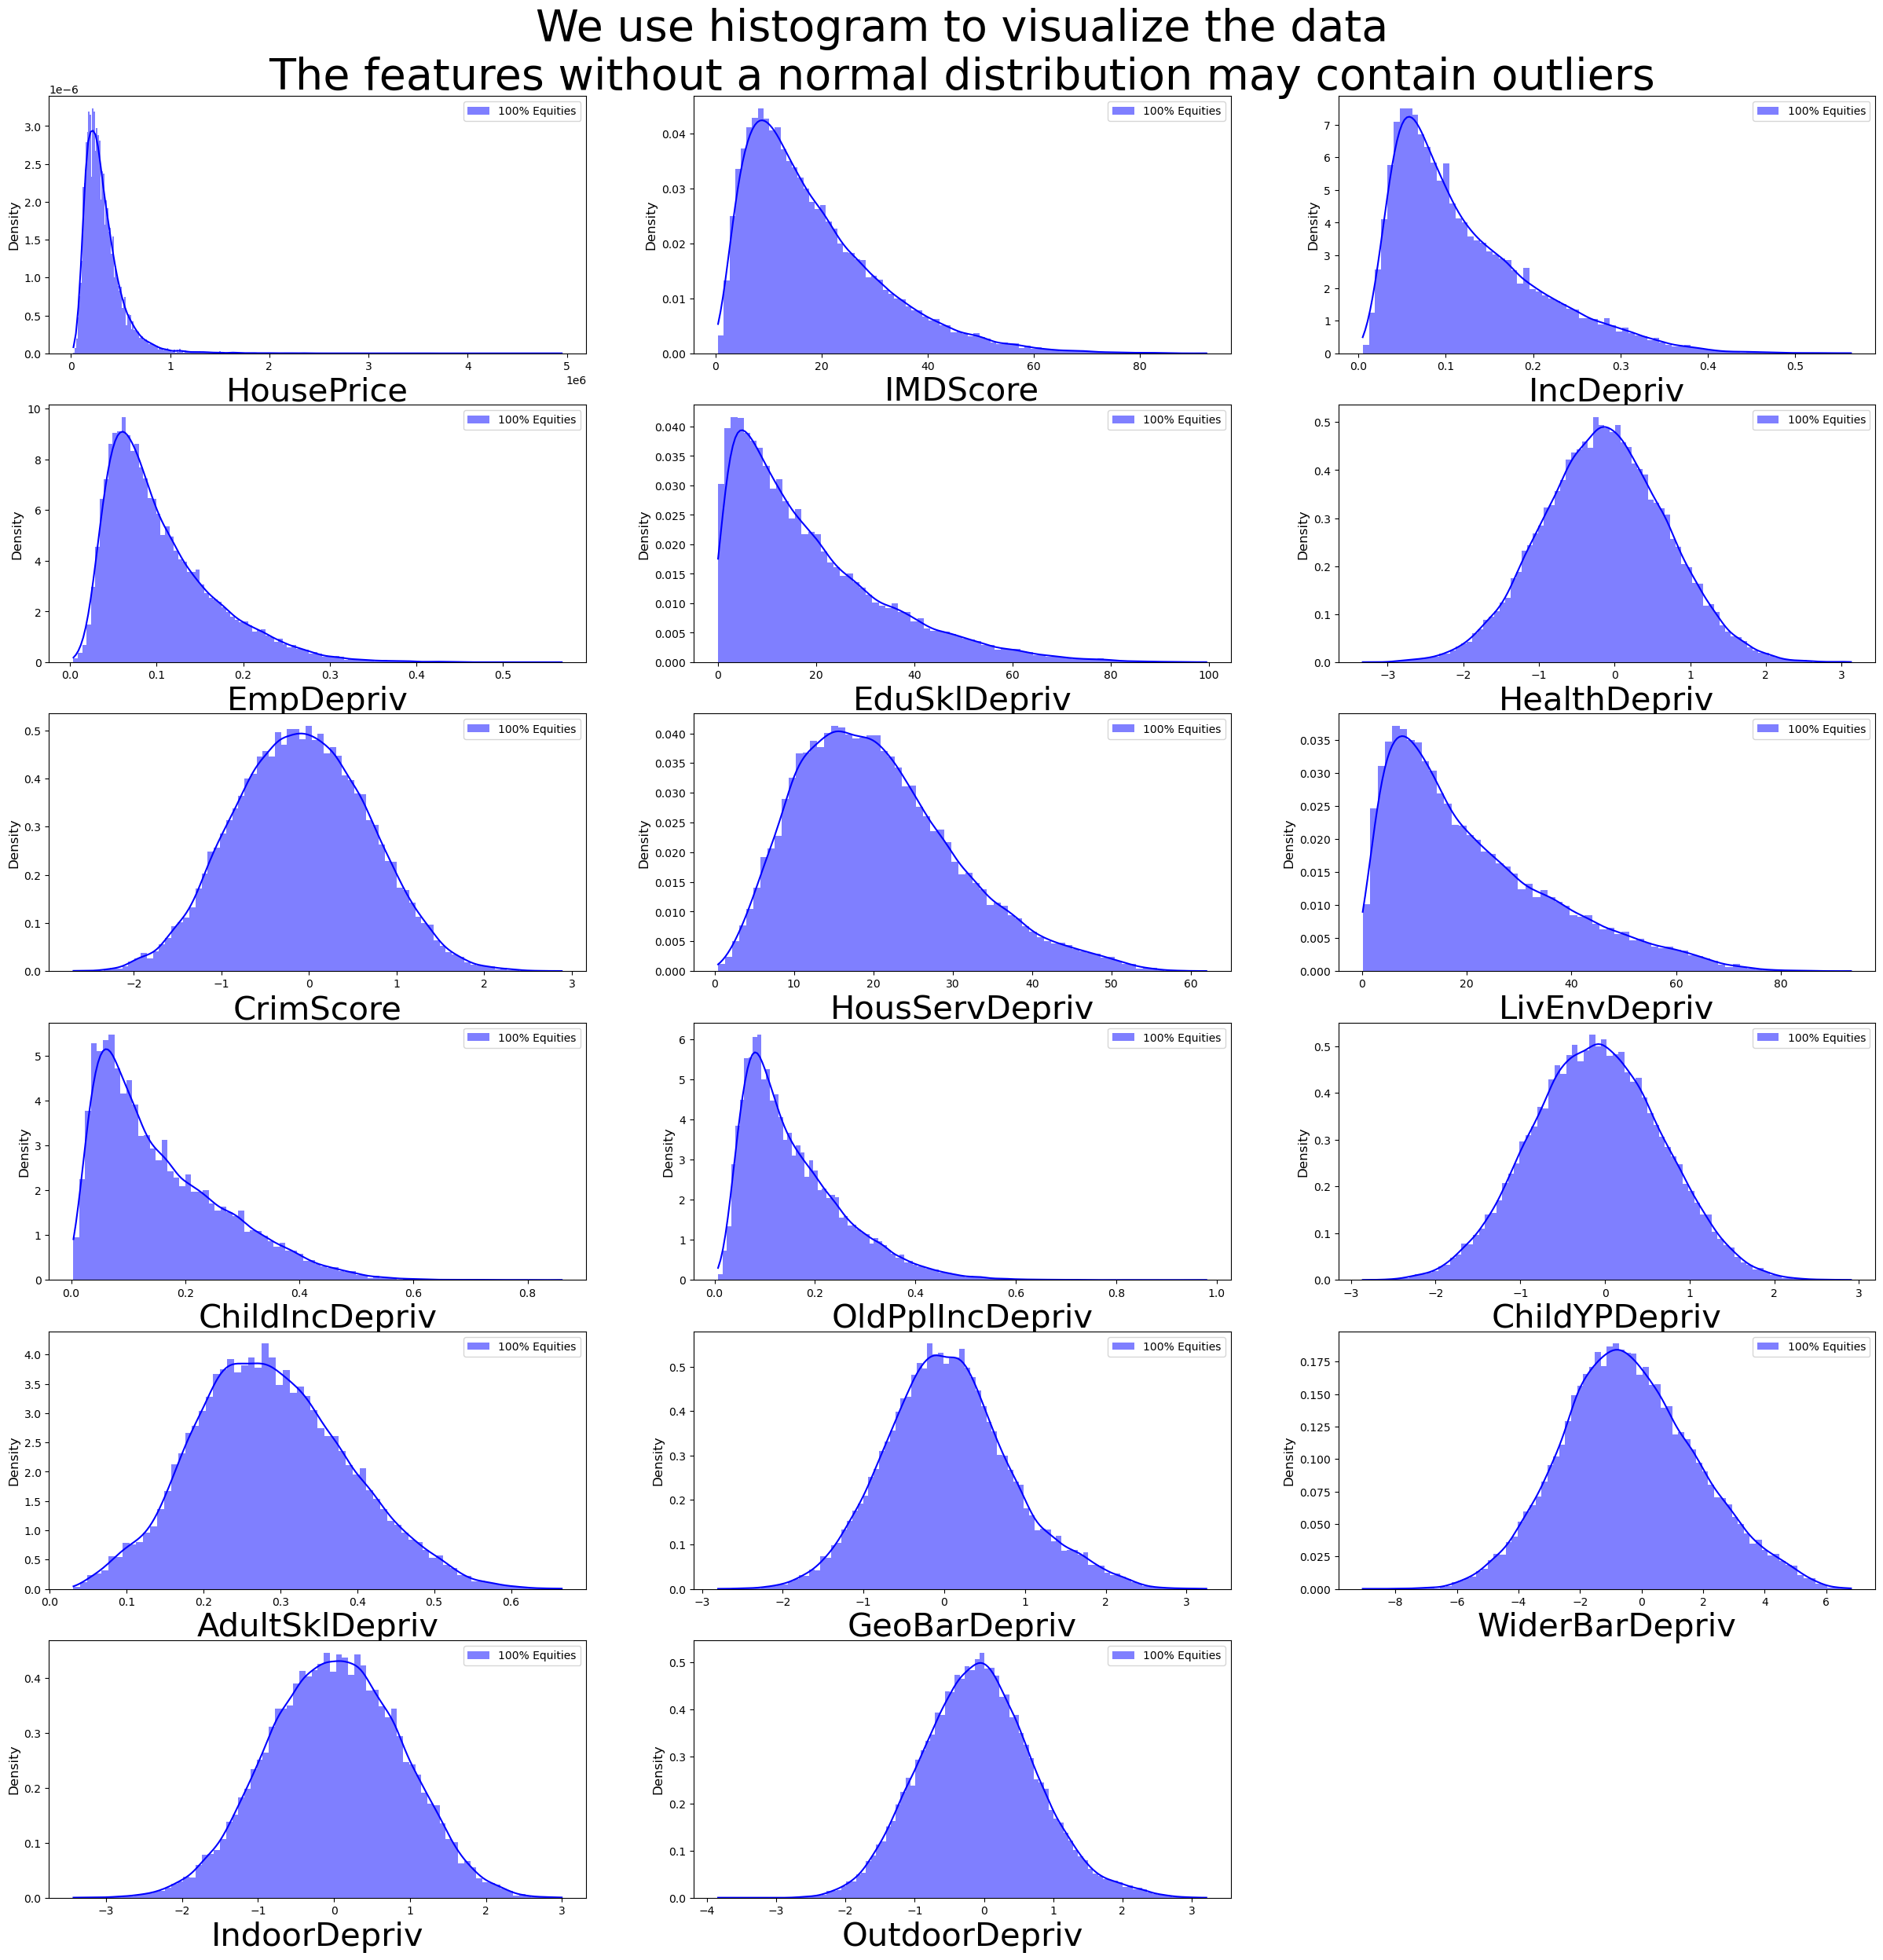

In [8]:
#we use histogram to visualize the data
#the features which dont have a normal distribution are likely to contain outliers
# from the histogram the following have oultliers YearendingDec2021', 'IndexofMultipleDeprivationIMDScore',
#'IncomeScorerate','EmploymentScorerate', 'EducationSkillsandTrainingScore','LivingEnvironmentScore',
#'IncomeDeprivationAffectingChildrenIndexIDACIScorerate','IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate
columns_to_plot = allNumericFeatures

#plt.suptitle("Histograms of Numeric Features with Potential Outliers", fontsize=24, y=0.95)
num_rows = 8  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_to_plot) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 40))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0, ax=axes[i])
    axes[i].set_xlabel(column, fontsize=30)
    axes[i].set_ylabel('Density', fontsize=12)
    axes[i].legend()

# Remove any empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.title("We use histogram to visualize the data\nThe features without a normal distribution may contain outliers", fontsize=40, y=7)
#plt.tight_layout()
plt.show()


# Check outliers using box plot

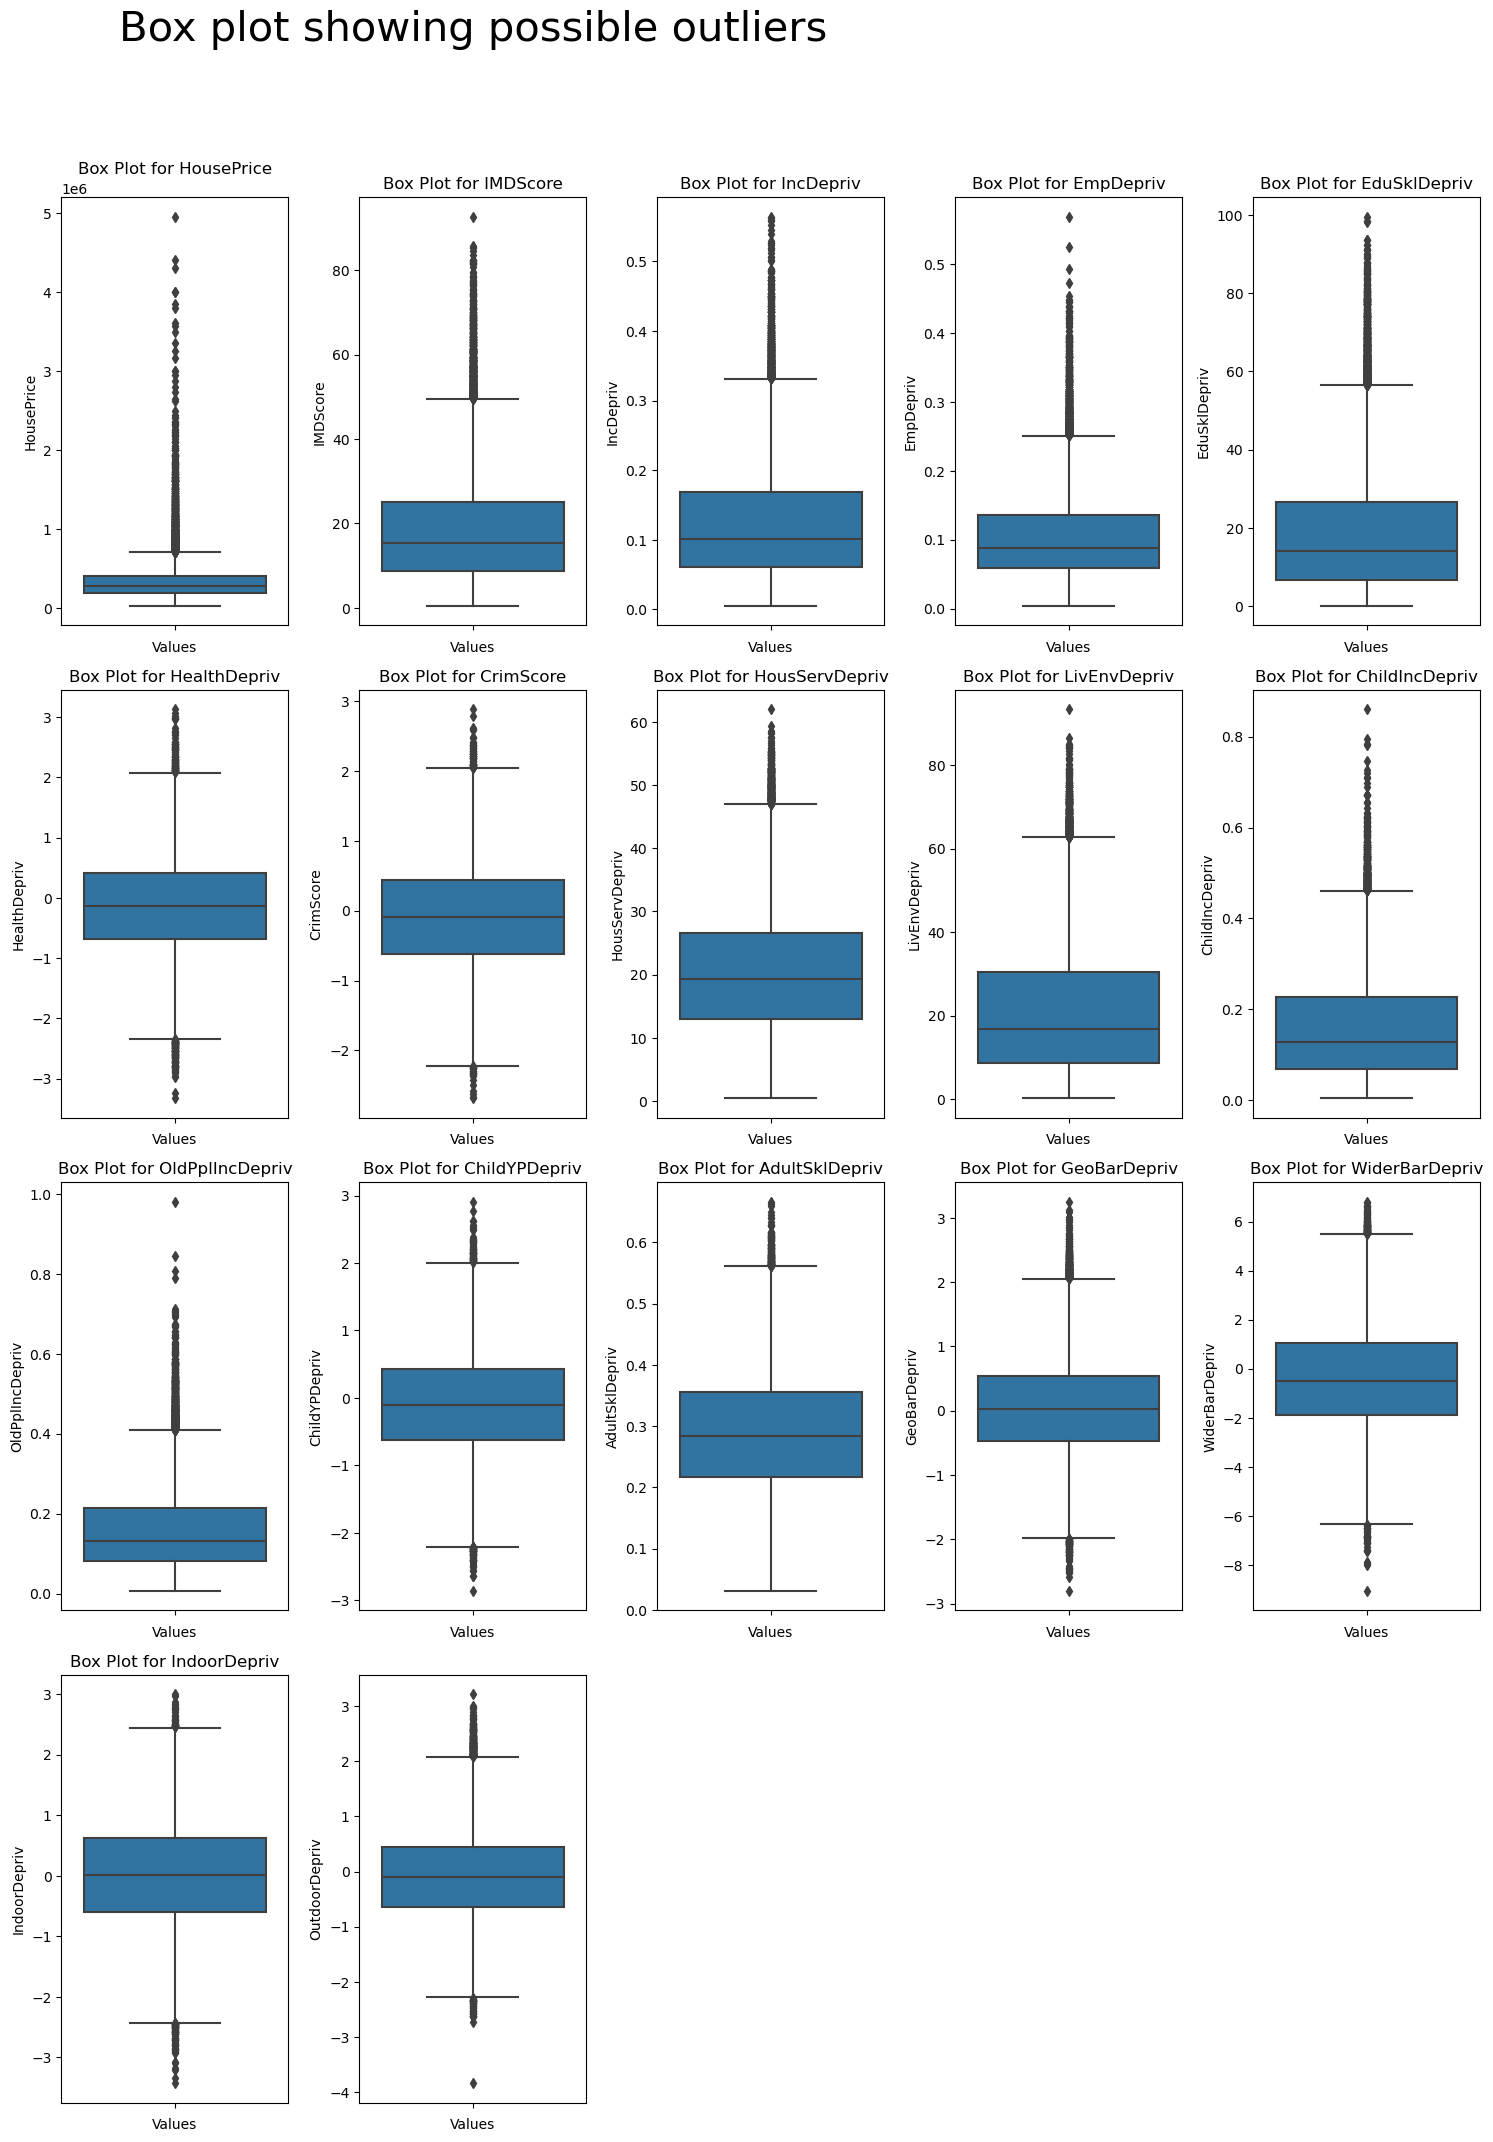

In [9]:
columns_with_outliers = allNumericFeatures

# Calculate the number of rows and columns for subplots
num_rows = 4  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_with_outliers) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df, y=column, ax=axes[i])  # Flip the box plot horizontally by setting y=column
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Remove any empty subplots
for i in range(len(columns_with_outliers), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title("Box plot showing possible outliers", fontsize=30, y=4.8)
plt.show()


# Removing outliers using Zcore

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df_no_outliers = df
# Z-score threshold
zScore = 2


# Loop through columns
for column in columns_with_outliers:
    z_scores = np.abs(stats.zscore(df_no_outliers[column]))  # Calculate Z-scores
    outliers_removed = df_no_outliers[z_scores < zScore]  # Remove outliers

    print(f'Column: {column}')
    print('Before removing outliers:', len(df))
    print('After removing outliers:', len(outliers_removed))
    print('Outliers:', len(df) - len(outliers_removed))
    

    df_no_outliers = outliers_removed  # Update DataFrame for next iteration


Column: HousePrice
Before removing outliers: 28003
After removing outliers: 27085
Outliers: 918
Column: IMDScore
Before removing outliers: 28003
After removing outliers: 25763
Outliers: 2240
Column: IncDepriv
Before removing outliers: 28003
After removing outliers: 24529
Outliers: 3474
Column: EmpDepriv
Before removing outliers: 28003
After removing outliers: 23467
Outliers: 4536
Column: EduSklDepriv
Before removing outliers: 28003
After removing outliers: 22332
Outliers: 5671
Column: HealthDepriv
Before removing outliers: 28003
After removing outliers: 21385
Outliers: 6618
Column: CrimScore
Before removing outliers: 28003
After removing outliers: 20478
Outliers: 7525
Column: HousServDepriv
Before removing outliers: 28003
After removing outliers: 19565
Outliers: 8438
Column: LivEnvDepriv
Before removing outliers: 28003
After removing outliers: 18530
Outliers: 9473
Column: ChildIncDepriv
Before removing outliers: 28003
After removing outliers: 17667
Outliers: 10336
Column: OldPplIncDepr

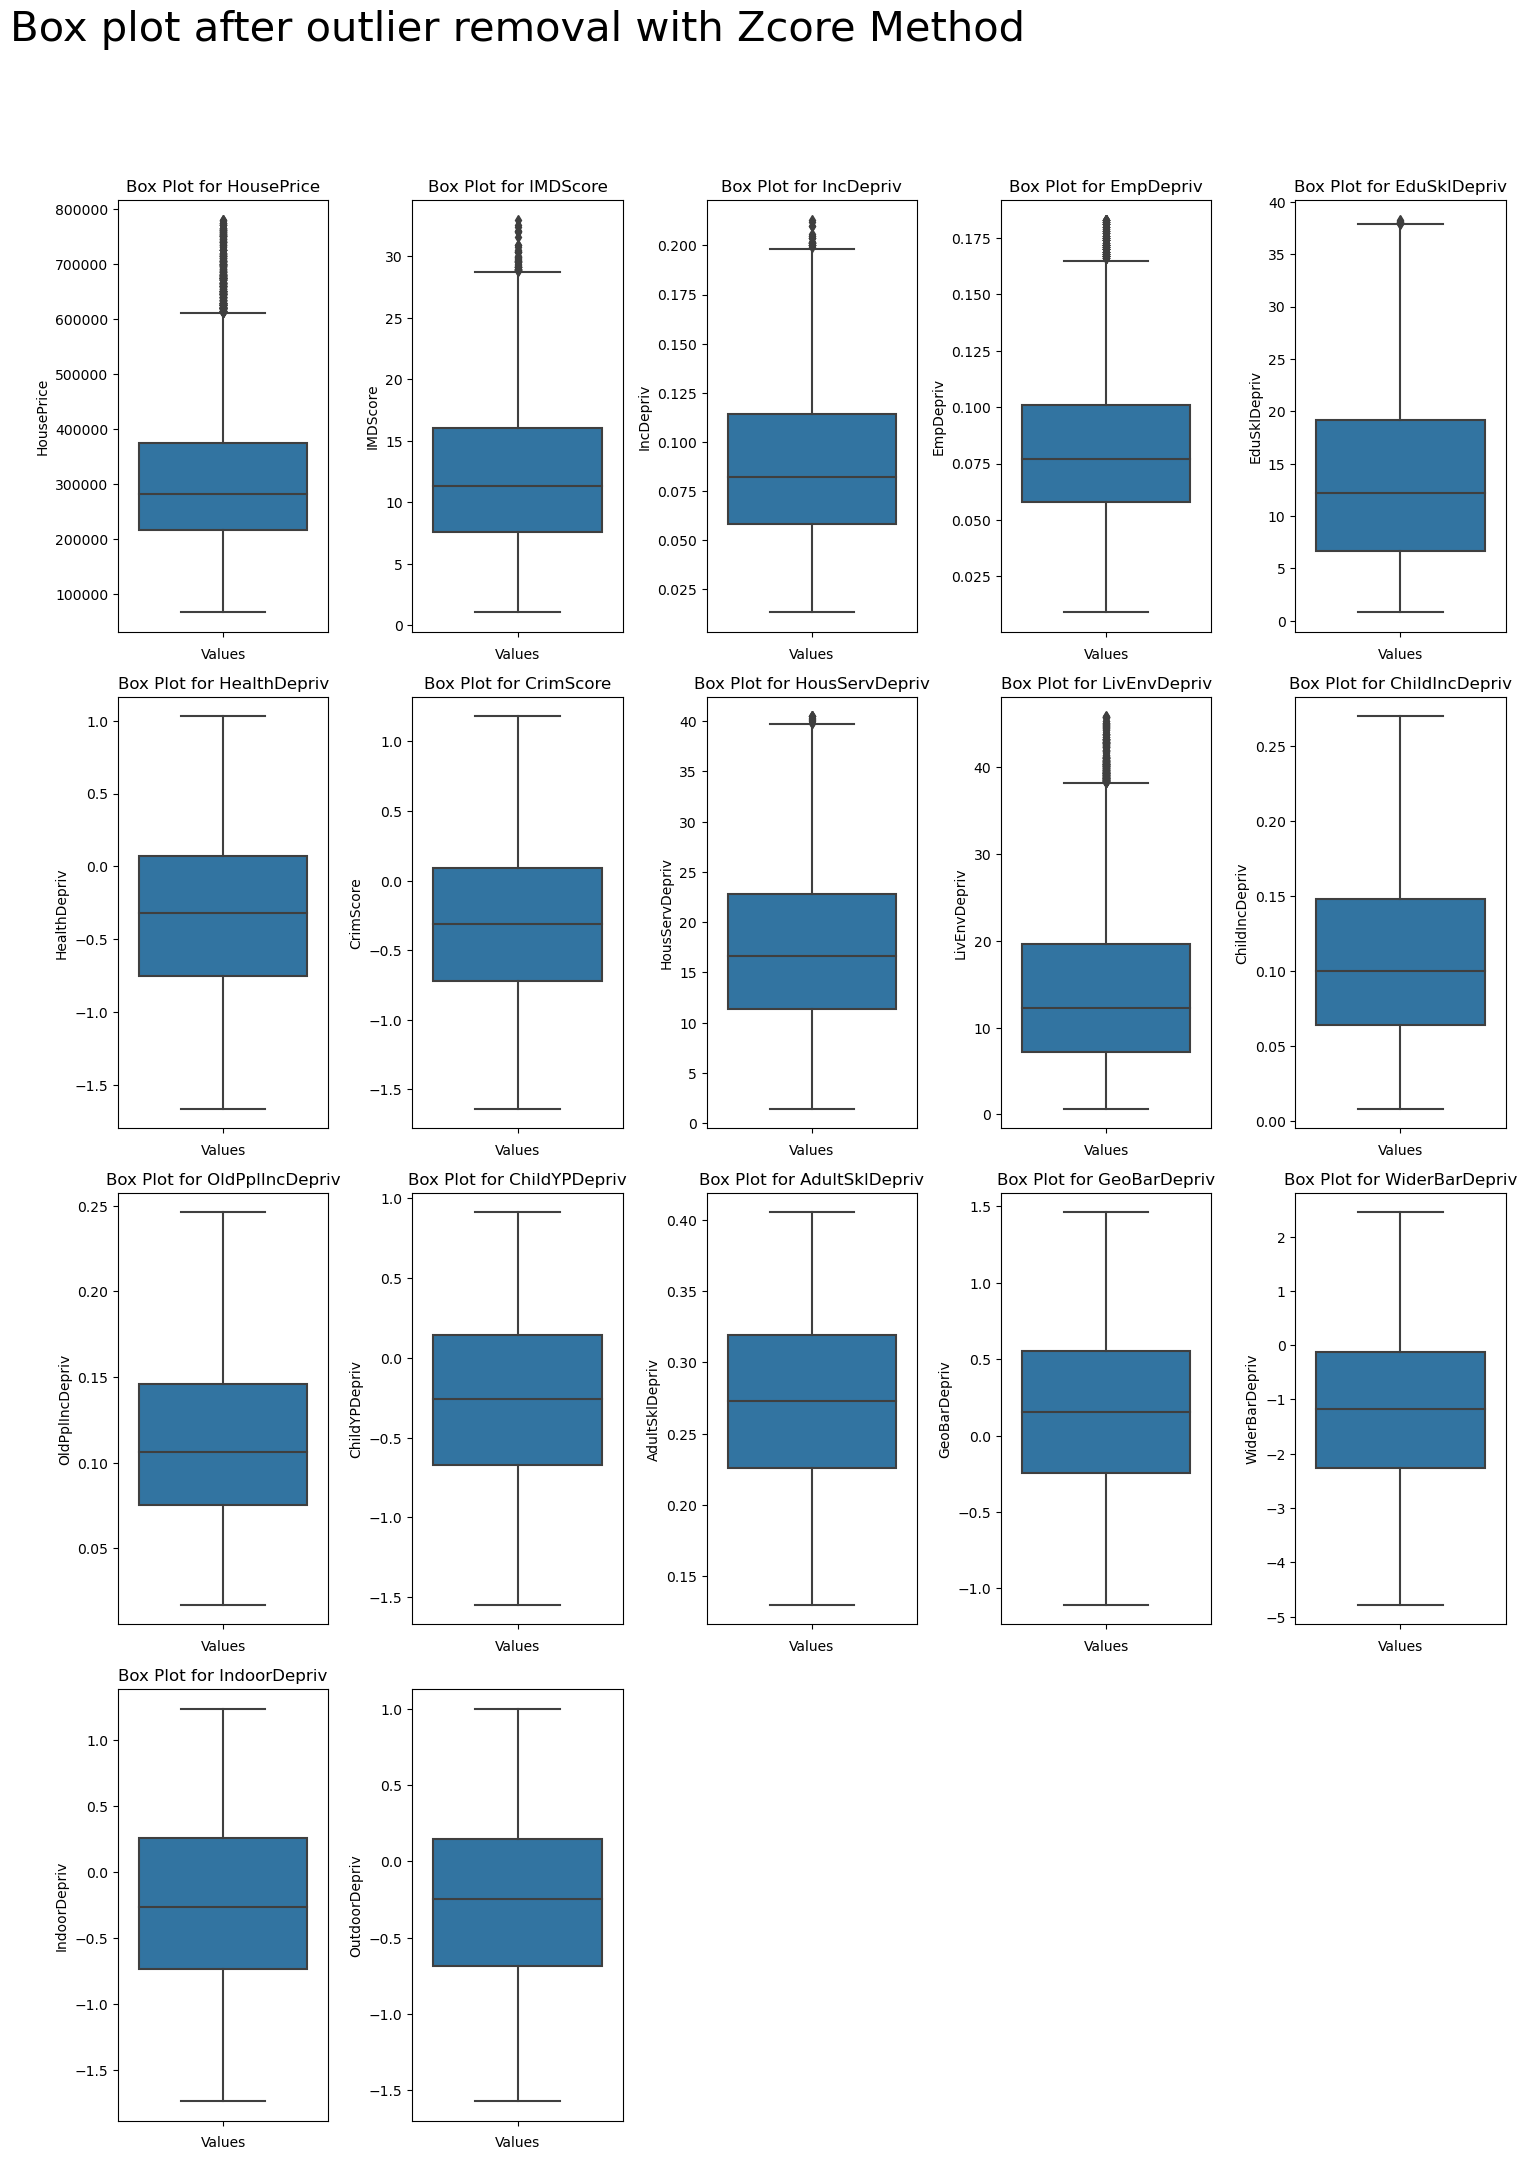

In [11]:
columns_with_outliers = allNumericFeatures

# Calculate the number of rows and columns for subplots
num_rows = 4  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_with_outliers) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df_no_outliers, y=column, ax=axes[i])  # Flip the box plot horizontally by setting y=column
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Remove any empty subplots
for i in range(len(columns_with_outliers), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title("Box plot after outlier removal with Zcore Method", fontsize=30, y=4.8)
plt.show()


# Removing outliers using Interquartile Range IQR 

In [21]:
# List of features
features_to_process = ['HousePrice', 'IMDScore', 'IncDepriv', 'EmpDepriv', 'EduSklDepriv', 'HealthDepriv', 
                       'CrimScore', 'HousServDepriv', 'LivEnvDepriv', 'ChildIncDepriv', 'OldPplIncDepriv', 
                       'ChildYPDepriv', 'AdultSklDepriv', 'GeoBarDepriv', 'WiderBarDepriv', 'IndoorDepriv', 'OutdoorDepriv']

def mark_outliers(dfc, ft, scale):
    Q1 = dfc[ft].quantile(0.25)
    Q3 = dfc[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR
    
    outlier_indices = dfc.index[(dfc[ft] < lower_bound) | (dfc[ft] > upper_bound)]
    return outlier_indices

def replace_outliers_with_median(dfc, ft, outlier_indices):
    median = dfc[ft].mean()
    dfc.loc[outlier_indices, ft] = median
    return dfc

# Iterate through each feature and perform outlier identification and replacement
df_no_outliers = df
for feature in features_to_process:
    outlier_indices = mark_outliers(df_no_outliers, feature, 0.5)
    df_no_outliers = replace_outliers_with_median(df_no_outliers, feature, outlier_indices)


In [28]:
#Build function to mark rows with outliers
def outliers(dfc, ft, scale):
    Q1 = dfc[ft].quantile(0.25)
    Q3 = dfc[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - scale * IQR
    upper_bound = Q3 + scale * IQR
    
    ls = df.index[ (dfc[ft] < lower_bound) | (dfc[ft] > upper_bound)]
    print("feature name : "+ft)
    print("Number of outliers : "+str(len(sorted(set(ls)))))
    print("third quartile "+str(Q3))
    print("first quartile "+str(Q3))
    print("Inter Quartile Range "+str(IQR))
    print("\--------------------------- ")
    return ls
    

    
    
    
#Build function to remove rows marked as outliers
    
def removeOutlierIndex(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [29]:
#Call function to mark rows with outliers
index_list = []
for feature in columns_with_outliers:
    index_list.extend(outliers(df,feature,0.5))

feature name : HousePrice
Number of outliers : 4349
third quartile 400000.0
first quartile 400000.0
Inter Quartile Range 205005.0
\--------------------------- 
feature name : IMDScore
Number of outliers : 3646
third quartile 25.133000000000003
first quartile 25.133000000000003
Inter Quartile Range 16.283500000000004
\--------------------------- 
feature name : IncDepriv
Number of outliers : 3679
third quartile 0.169
first quartile 0.169
Inter Quartile Range 0.10800000000000001
\--------------------------- 
feature name : EmpDepriv
Number of outliers : 4070
third quartile 0.136
first quartile 0.136
Inter Quartile Range 0.07700000000000001
\--------------------------- 
feature name : EduSklDepriv
Number of outliers : 3791
third quartile 26.490499999999997
first quartile 26.490499999999997
Inter Quartile Range 19.975499999999997
\--------------------------- 
feature name : HealthDepriv
Number of outliers : 5033
third quartile 0.418
first quartile 0.418
Inter Quartile Range 1.107
\--------

In [30]:
#Cal function to remove outlier rows
df_no_outliers = removeOutlierIndex(df,index_list)

In [31]:
df_no_outliers.shape

(7510, 19)

# Now lets view the box plot after removing outliers

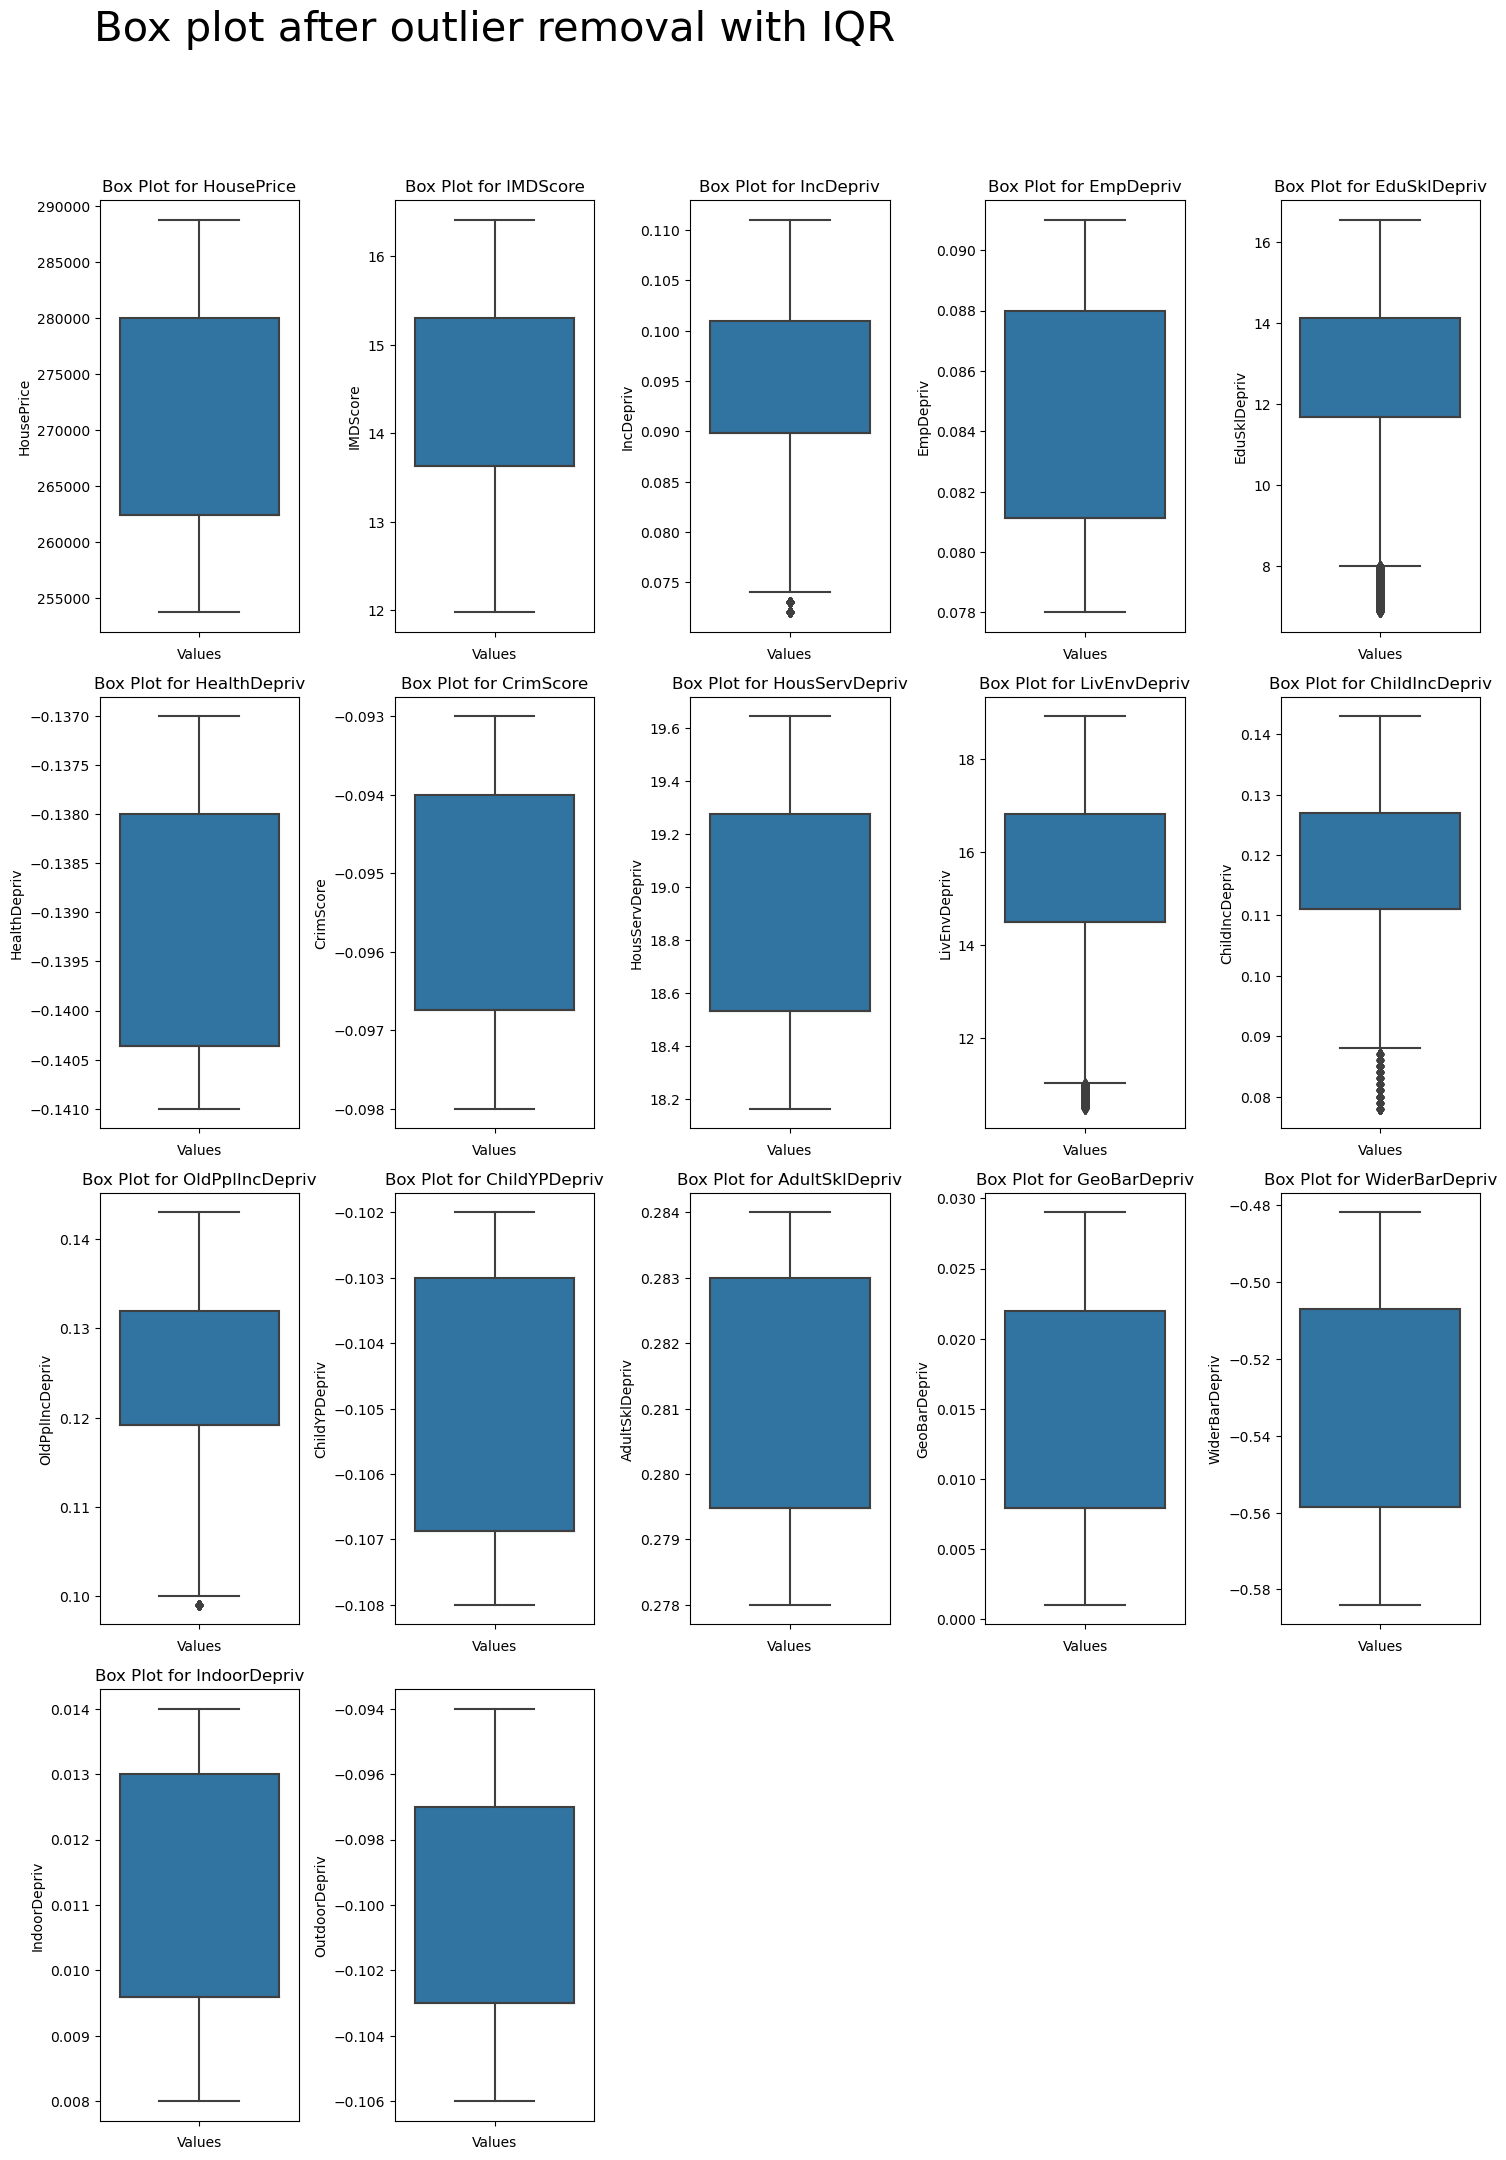

In [20]:
columns_with_outliers = allNumericFeatures

# Calculate the number of rows and columns for subplots
num_rows = 4  # You can adjust this based on the number of subplots you want per row
num_cols = len(columns_with_outliers) // num_rows + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))  # Adjust figsize if needed

# Flatten axes to make it easier to plot
axes = axes.flatten()

# Loop through the columns and create box plots
for i, column in enumerate(columns_with_outliers):
    sns.boxplot(data=df_no_outliers, y=column, ax=axes[i])  # Flip the box plot horizontally by setting y=column
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel(column)

# Remove any empty subplots
for i in range(len(columns_with_outliers), num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.title("Box plot after outlier removal with IQR", fontsize=30, y=4.8)
plt.show()


# Now Normalzing the data

In [33]:
#Normalzie all the designated features to normalize here
#When we are normalizing we want to keep the original data untouched so we normalize into a different column
dfp = df_no_outliers #where dfp is dataframe processed
dfp[featuresNormalized] = dfp[allNumericFeatures].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

print("finished preprocessing.....")
dfp.head()

finished preprocessing.....


,LSOACode,LSOAName,HousePrice,IMDScore,IncDepriv,EmpDepriv,EduSklDepriv,HealthDepriv,CrimScore,HousServDepriv,...,HousServDepriv_n,LivEnvDepriv_n,ChildIncDepriv_n,OldPplIncDepriv_n,ChildYPDepriv_n,AdultSklDepriv_n,GeoBarDepriv_n,WiderBarDepriv_n,IndoorDepriv_n,OutdoorDepriv_n
22,E01000037,Barking and Dagenham 003B,438000.0,20.079,0.147,0.153,19.495,-0.347,-0.319,25.012,...,0.692518,0.413434,0.629252,0.322709,0.504269,0.730909,0.319664,0.992239,0.480722,0.706152
256,E01000326,Bexley 014B,318500.0,11.460,0.091,0.046,17.612,-0.721,0.195,19.939,...,0.505529,0.517354,0.574830,0.187251,0.592979,0.570909,0.421443,0.755694,0.635767,0.614784
257,E01000327,Bexley 017A,499995.0,8.152,0.056,0.058,10.868,-1.019,0.251,16.501,...,0.378806,0.306449,0.248299,0.131474,0.252846,0.541818,0.377470,0.662224,0.212469,0.797521
258,E01000328,Bexley 017B,421000.0,9.397,0.070,0.060,16.892,-1.201,0.330,18.258,...,0.443568,0.161767,0.336735,0.231076,0.356736,0.734545,0.363636,0.737979,0.264561,0.435721
259,E01000329,Bexley 017C,364000.0,17.024,0.145,0.110,18.955,-0.574,0.269,21.306,...,0.555916,0.274243,0.857143,0.239044,0.333017,0.825455,0.484684,0.751982,0.376538,0.570707


# Now lets view correlation heatmap

<Axes: >

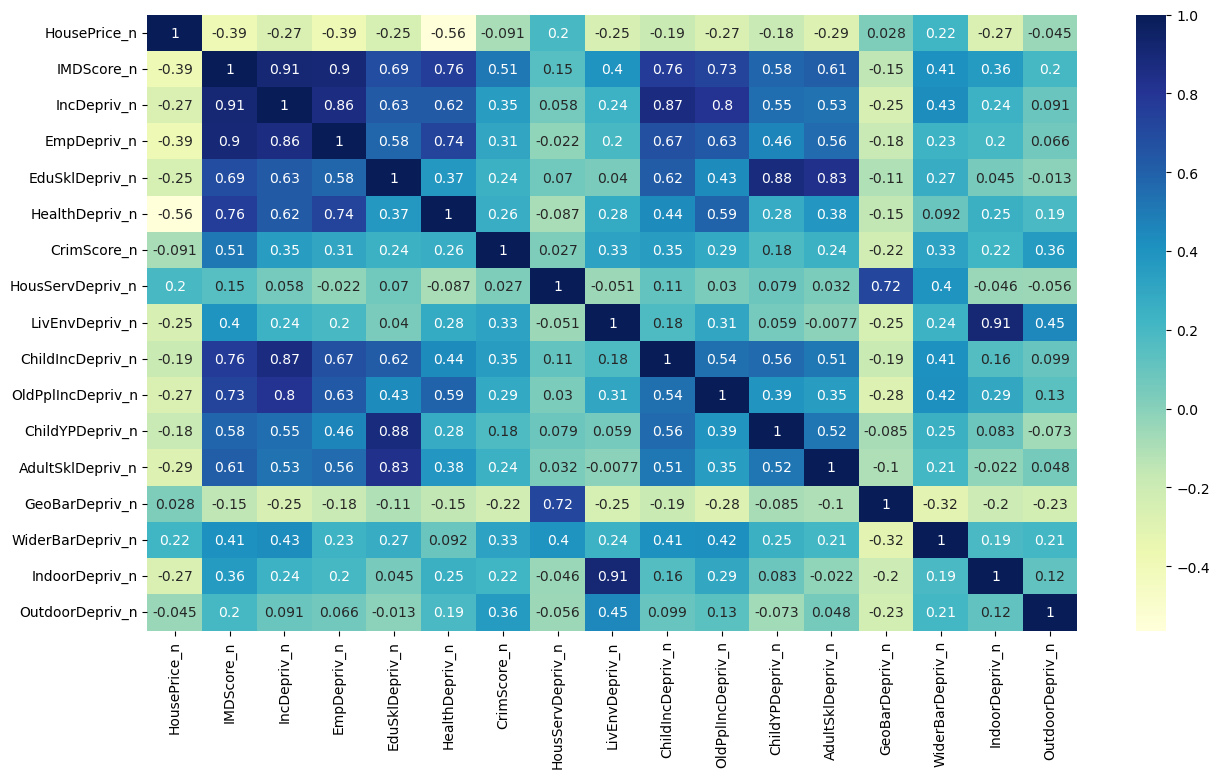

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(dfp[featuresNormalized].corr(), annot= True,  cmap="YlGnBu")